# Brief introduction to TCGA

**The Cancer Genome Atlas (TCGA)** contains **DNA**, **RNA**, **protein** and **epigenetic** measurements of a **large number of human tumors**.

Two versions of TCGA are available: legacy and Genomic Data Commons (GDC). **Legacy TCGA** is the original version. **GDC TCGA** is a standardized version of legacy TCGA. A few differences exist between both. *For instance, in legacy TCGA, genes are aligned on the hg19 human reference genome (GRCh37) whereas in GDC TCGA, they are aligned on the hg38 (GRCh38). In legacy TCGA, gene expression is reported as an estimated count by RSEM whereas in GDC TCGA, it is expressed in Fragments per Kilo base of transcript per Million mapped reads (FPKM). See [this publication](https://www.sciencedirect.com/science/article/pii/S2405471219302017?via%3Dihub) for more details.*

[Access to legacy TCGA](https://portal.gdc.cancer.gov/legacy-archive/search/f)

[Access to GDC TCGA](https://portal.gdc.cancer.gov/)


[Website describing TCGA program](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga)

[Website describing the GDC pipeline](https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/)

### Citation

When using any data from TCGA, acknowledge the TCGA Research Network in the acknowledgements section of your work. E.g. "The results published or shown here are in whole or part based upon data generated by the TCGA Research Network: https://www.cancer.gov/tcga."

# Librairies

In [2]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)

import json
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *

set_pyplot()

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Path

In [7]:
name = 'BRCA'  # BRCA, KIRC
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

### Format the dataset

In [8]:
database = 'gdc'
label_name = 'sample_type.samples'
assert label_name in get_possible_classes(database, name), f"The class has to be chosen within this list {get_possible_classes(database, name)}."

In [9]:
data = TCGA_dataset(data_path, database, name, label_name)

### Describe the dataset

In [10]:
describe_dataset(data)

The dataset contains 2 classes. Here are the classes and their respective number of samples:
	Primary Tumor: 1097
	Solid Tissue Normal: 113
In total, there are 1210 samples, each of them containing 58274 features.


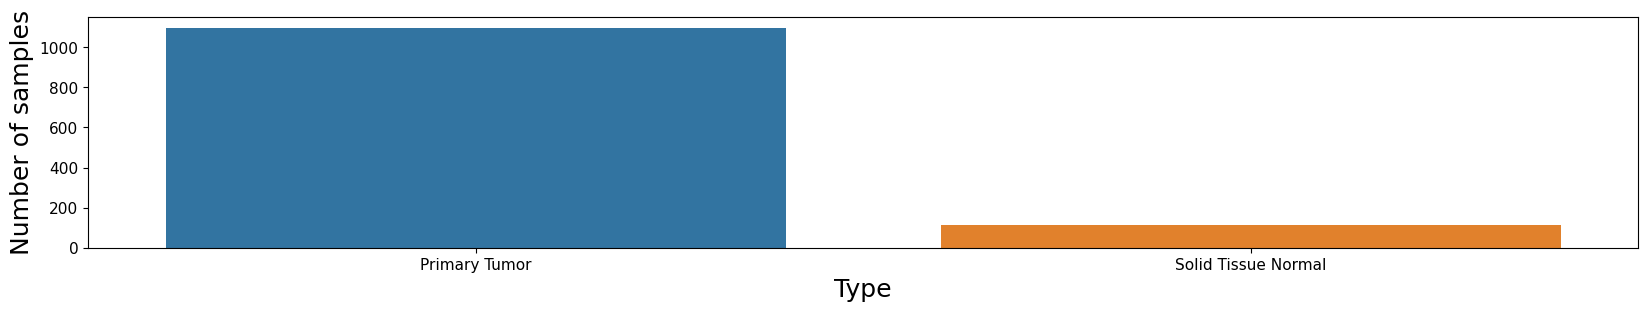

In [11]:
create_new_folder(save_path)
plot_class_imbalance(data, label_name, save_path)

In [7]:
# Each gene is represented by an expression such as 'ENSG00000000003.13'.
# This is the Ensembl Gene id. 

# Code to find the index of a gene from its name.
# np.argwhere(np.array(data.genes_IDs) == 'ENSG00000000003.13')

### Save the names of the genes to reuse them later

In [8]:
# json.dump(data.genes_IDs, open(os.path.join(save_path, "genesIds.txt"),'w'))
# genes_IDs = json.load(open(os.path.join(save_path, "genesIds.txt"))